In [15]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("property_data.csv")
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [9]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [10]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [11]:
kondisi = df['ST_NUM'].isnull()
df[kondisi]['ST_NUM']

2   NaN
6   NaN
Name: ST_NUM, dtype: float64

In [12]:
kondisi = df['NUM_BEDROOMS'].isnull()
df[kondisi]['NUM_BEDROOMS']

2    NaN
5    NaN
Name: NUM_BEDROOMS, dtype: object

In [32]:
# PERBAIKI LOAD DATA

missing = ['na', '--', '-', 'NA']
df = pd.read_csv("property_data.csv", na_values=missing)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [33]:
# UNEXPECTED MISSING VALUE
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [34]:
for i, row in df.iterrows():
    if row['OWN_OCCUPIED'] != 'Y' and row['OWN_OCCUPIED'] != 'N':
        df.loc[i, 'OWN_OCCUPIED'] = np.nan

In [35]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [36]:
df['NUM_BATH']

0         1
1       1.5
2         1
3       NaN
4         2
5         1
6    HURLEY
7         1
8         2
Name: NUM_BATH, dtype: object

In [37]:
for i, row in df.iterrows():
    if type(row['NUM_BATH']) != float:
        if row['NUM_BATH'].isdecimal():
            if int(row['NUM_BATH']) < 0:
                df.loc[i, 'NUM_BATH'] = np.nan
        else:
            df.loc[i, 'NUM_BATH'] = np.nan

df['NUM_BATH'] = df['NUM_BATH'].astype(float)


In [38]:
df['NUM_BATH']

0    1.0
1    NaN
2    1.0
3    NaN
4    2.0
5    1.0
6    NaN
7    1.0
8    2.0
Name: NUM_BATH, dtype: float64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  7 non-null      object 
 4   NUM_BEDROOMS  5 non-null      float64
 5   NUM_BATH      6 non-null      float64
 6   SQ_FT         7 non-null      float64
dtypes: float64(5), object(2)
memory usage: 632.0+ bytes


In [40]:
df.isnull()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True
2,False,True,False,False,True,False,False
3,False,False,False,True,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,True,False
7,False,False,False,False,True,False,True
8,False,False,False,False,True,False,False


In [41]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        3
SQ_FT           2
dtype: int64

In [42]:
df.isnull().sum(axis=0)

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        3
SQ_FT           2
dtype: int64

In [43]:
df.isnull().sum(axis=1)

0    0
1    2
2    2
3    2
4    1
5    1
6    3
7    2
8    1
dtype: int64

In [44]:
# inputasi missing value
df['PID'].fillna(100005000, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [45]:
df['ST_NUM'].fillna(0, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,NaN
2,100003000.0,0.0,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,0.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [46]:
df['OWN_OCCUPIED'].mode()[0]

'Y'

In [47]:
df['OWN_OCCUPIED'].fillna(df['OWN_OCCUPIED'].mode()[0], inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,NaN
2,100003000.0,0.0,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,0.0,WASHINGTON,Y,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [50]:
df['NUM_BEDROOMS'].median()

3.0

In [51]:
df['NUM_BEDROOMS'].fillna(df['NUM_BEDROOMS'].median(), inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,NaN
2,100003000.0,0.0,LEXINGTON,N,3.0,1.0,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1.0,800.0
6,100007000.0,0.0,WASHINGTON,Y,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2.0,1800.0


In [53]:
# data kedua
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df_obes = pd.ExcelFile("obes.xls")

In [56]:
# !pip install xlrd

In [57]:
df_obes.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [58]:
df_age = df_obes.parse('7.2', skiprows=4, skipfooter=14)
df_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [59]:
df_age.rename(columns={'Unnamed: 0' : 'year'}, inplace=True)
df_age

,year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [60]:
df_age.dropna(inplace=True)
df_age

,year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [61]:
df_age.reset_index(inplace=True)
df_age

,index,year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
1,2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2,3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
3,4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
4,5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
5,6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
6,7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
7,8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
8,9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
9,10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [62]:
df_age.drop('index', axis=1, inplace=True)
df_age

,year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
1,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
3,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
4,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
5,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
6,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
7,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
8,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
9,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [63]:
# set explicit index
df_age.set_index('year', inplace=True)
df_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [64]:
df_age.loc['2010/11', :]

Total          11574.0
Under 16         525.0
16-24            375.0
25-34           1425.0
35-44           3277.0
45-54           3573.0
55-64           1820.0
65-74            456.0
75 and over      115.0
Name: 2010/11, dtype: float64

<AxesSubplot:xlabel='year'>

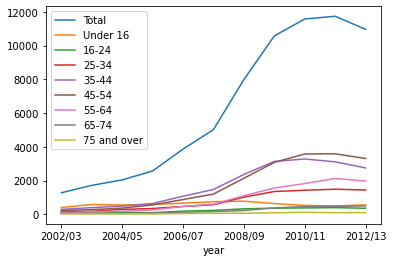

In [65]:
df_age.plot()

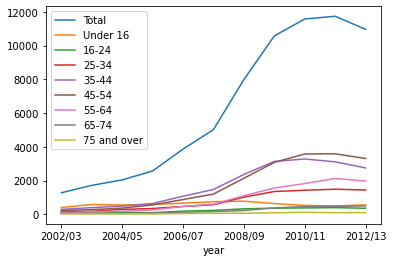

In [66]:
df_age.plot();

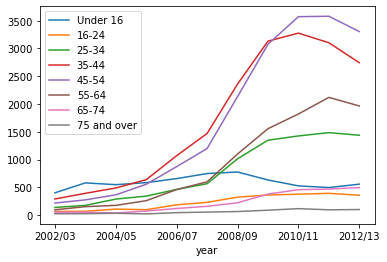

In [67]:
df_age.drop('Total', axis=1).plot();

In [68]:
# time series
from datetime import datetime

In [69]:
datetime.now()

datetime.datetime(2022, 2, 24, 21, 15, 31, 139300)

In [70]:
date_rng = pd.date_range(start='1/01/2022', end='1/08/2022')
date_rng

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08'],
              dtype='datetime64[ns]', freq='D')

In [71]:
date_rng_jam = pd.date_range(start='1/01/2022', end='1/08/2022', freq='H')
date_rng_jam

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-01-07 15:00:00', '2022-01-07 16:00:00',
               '2022-01-07 17:00:00', '2022-01-07 18:00:00',
               '2022-01-07 19:00:00', '2022-01-07 20:00:00',
               '2022-01-07 21:00:00', '2022-01-07 22:00:00',
               '2022-01-07 23:00:00', '2022-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [76]:
data = pd.DataFrame(date_rng_jam, columns=['date'])
data['data'] = np.random.randint(0, 100, size=(len(date_rng_jam)))
data

,date,data
0,2022-01-01 00:00:00,7
1,2022-01-01 01:00:00,75
2,2022-01-01 02:00:00,16
3,2022-01-01 03:00:00,74
4,2022-01-01 04:00:00,73
...,...,...
164,2022-01-07 20:00:00,43
165,2022-01-07 21:00:00,15
166,2022-01-07 22:00:00,13
167,2022-01-07 23:00:00,45


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    169 non-null    datetime64[ns]
 1   data    169 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.1 KB


In [78]:
data.set_index('date', inplace=True)
data

,data
date,
2022-01-01 00:00:00,7
2022-01-01 01:00:00,75
2022-01-01 02:00:00,16
2022-01-01 03:00:00,74
2022-01-01 04:00:00,73
...,...
2022-01-07 20:00:00,43
2022-01-07 21:00:00,15
2022-01-07 22:00:00,13


In [79]:
kondisi = data.index.day == 1
data[kondisi]

,data
date,
2022-01-01 00:00:00,7
2022-01-01 01:00:00,75
2022-01-01 02:00:00,16
2022-01-01 03:00:00,74
2022-01-01 04:00:00,73
2022-01-01 05:00:00,17
2022-01-01 06:00:00,88
2022-01-01 07:00:00,42
2022-01-01 08:00:00,92


In [80]:
data['2022-01-01':'2022-01-02']

,data
date,
2022-01-01 00:00:00,7
2022-01-01 01:00:00,75
2022-01-01 02:00:00,16
2022-01-01 03:00:00,74
2022-01-01 04:00:00,73
2022-01-01 05:00:00,17
2022-01-01 06:00:00,88
2022-01-01 07:00:00,42
2022-01-01 08:00:00,92


In [81]:
data.resample('D').mean()

,data
date,
2022-01-01,49.583333
2022-01-02,49.625000
2022-01-03,55.833333
2022-01-04,50.958333
2022-01-05,52.666667
2022-01-06,43.583333
2022-01-07,45.416667
2022-01-08,28.000000


In [82]:
data['rolling'] = data.rolling(3).sum()
data.head()

,data,rolling
date,,
2022-01-01 00:00:00,7,NaN
2022-01-01 01:00:00,75,NaN
2022-01-01 02:00:00,16,98.0
2022-01-01 03:00:00,74,165.0
2022-01-01 04:00:00,73,163.0
